In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
np.random.seed(11)
import h5py
from scipy.special import erf
mpl.style.use('./plotting.mplstyle')

In [2]:
# Load AR results: Gaussian
gaussian_precomputed_data = h5py.File("./../mock-data/ar_gaussian_varyingUncertainty_069_summary.hdf","r")
gaussian_chis = gaussian_precomputed_data['posterior']['chis'][()]
gaussian_dR_dchis = gaussian_precomputed_data['posterior']['dR_dchis'][()]
gaussian_std = gaussian_precomputed_data['posterior']['ar_std'][()]
gaussian_tau = gaussian_precomputed_data['posterior']['ar_tau'][()]

# Delta function
spike_precomputed_data = h5py.File("./../mock-data/ar_spike_varyingUncertainty_069_summary.hdf","r")
spike_chis = spike_precomputed_data['posterior']['chis'][()]
spike_dR_dchis = spike_precomputed_data['posterior']['dR_dchis'][()]
spike_std = spike_precomputed_data['posterior']['ar_std'][()]
spike_tau = spike_precomputed_data['posterior']['ar_tau'][()]

# Gaussian+delta function function
gaussian_spike_precomputed_data = h5py.File("./../mock-data/ar_gaussian_spike_varyingUncertainty_069_summary.hdf","r")
gaussian_spike_chis = gaussian_spike_precomputed_data['posterior']['chis'][()]
gaussian_spike_dR_dchis = gaussian_spike_precomputed_data['posterior']['dR_dchis'][()]
gaussian_spike_std = gaussian_spike_precomputed_data['posterior']['ar_std'][()]
gaussian_spike_tau = gaussian_spike_precomputed_data['posterior']['ar_tau'][()]

# Half normal
half_normal_precomputed_data = h5py.File("./../mock-data/ar_half_normal_varyingUncertainty_069_summary.hdf","r")
half_normal_chis = half_normal_precomputed_data['posterior']['chis'][()]
half_normal_dR_dchis = half_normal_precomputed_data['posterior']['dR_dchis'][()]
half_normal_std = half_normal_precomputed_data['posterior']['ar_std'][()]
half_normal_tau = half_normal_precomputed_data['posterior']['ar_tau'][()]

# Also construct normalized probability distribution
gaussian_p_chis = gaussian_dR_dchis/np.trapz(gaussian_dR_dchis,gaussian_chis,axis=0)
spike_p_chis = spike_dR_dchis/np.trapz(spike_dR_dchis,spike_chis,axis=0)
gaussian_spike_p_chis = gaussian_spike_dR_dchis/np.trapz(gaussian_spike_dR_dchis,gaussian_spike_chis,axis=0)
half_normal_p_chis = half_normal_dR_dchis/np.trapz(half_normal_dR_dchis,half_normal_chis,axis=0)

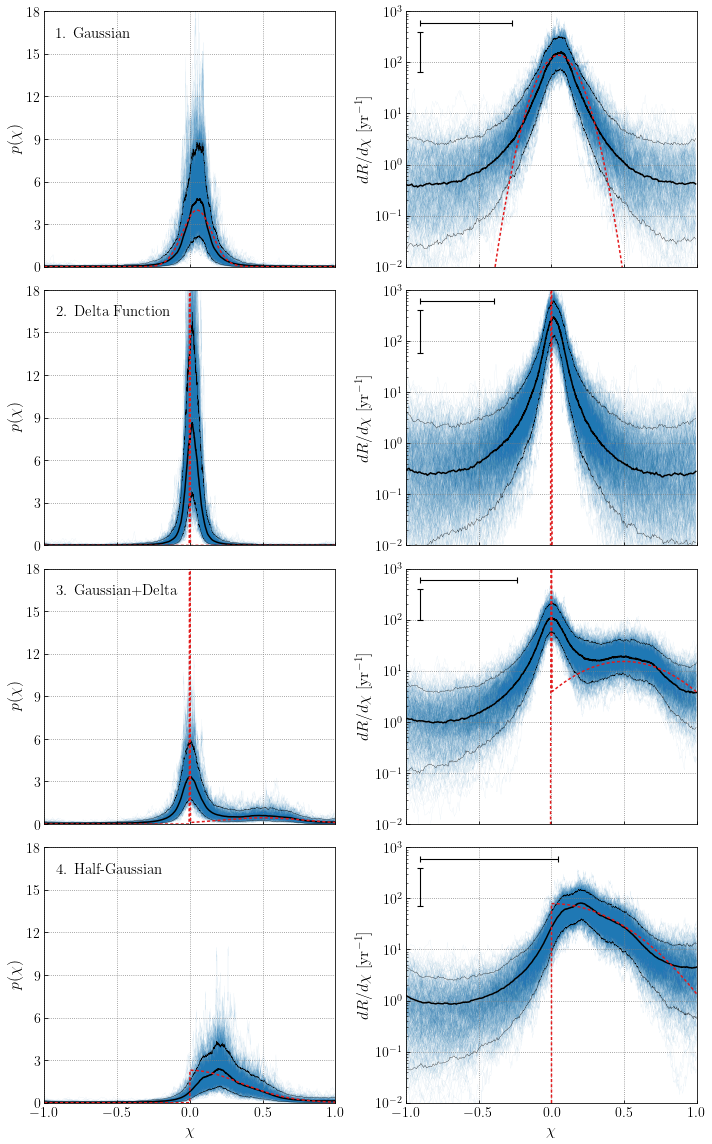

In [3]:
###########################################
# Gaussian population: probability density
###########################################

fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(421)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(gaussian_p_chis.shape[1]),size=300,replace=False):                 
    ax.plot(gaussian_chis,gaussian_p_chis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)

# Plot mean and bounds
ax.plot(gaussian_chis,np.mean(gaussian_p_chis,axis=1),color='black')
ax.plot(gaussian_chis,np.quantile(gaussian_p_chis,0.05,axis=1),color='black',lw=0.3)
ax.plot(gaussian_chis,np.quantile(gaussian_p_chis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
x_grid = np.linspace(-1,1,300)
true_mu = 0.05
true_sig = 0.1
true_p_chi = np.exp(-(x_grid-true_mu)**2/(2.*true_sig**2))/np.sqrt(2.*np.pi*true_sig**2)
ax.plot(x_grid,true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,18)
ax.set_xticklabels([])
ax.set_yticks(np.arange(0,21,3))
ax.set_ylabel(r'$p(\chi)$',fontsize=16)
ax.text(-0.92,16.2,'1. Gaussian',fontsize=15)

###########################################
# Gaussian population: number density
###########################################

ax = fig.add_subplot(422)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(gaussian_dR_dchis.shape[1]),size=300,replace=False):                 
    ax.plot(gaussian_chis,gaussian_dR_dchis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)
    
ax.plot(gaussian_chis,np.median(gaussian_dR_dchis,axis=1),color='black')
ax.plot(gaussian_chis,np.quantile(gaussian_dR_dchis,0.05,axis=1),color='black',lw=0.3)
ax.plot(gaussian_chis,np.quantile(gaussian_dR_dchis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
ax.plot(x_grid,(69./2.)*true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Also add indicators for inferred length scale and variance
gaussian_std_median = np.median(np.exp(gaussian_std))
gaussian_tau_median = np.median(gaussian_tau)

# yerr needs to span a range(max/std,max), so that lower error is max-max/std
ax.errorbar(-0.9,400,yerr=np.array([[400.-400./gaussian_std_median],[0]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)
ax.errorbar(-0.9,600,xerr=np.array([[0],[gaussian_tau_median]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e3)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$dR/d\chi$ [$\mathrm{yr}^{-1}$]',fontsize=16)

###########################################
# Delta population: probability density
###########################################

ax = fig.add_subplot(423)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(spike_p_chis.shape[1]),size=300,replace=False):                 
    ax.plot(spike_chis,spike_p_chis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)

# Plot mean and bounds
ax.plot(spike_chis,np.mean(spike_p_chis,axis=1),color='black')
ax.plot(spike_chis,np.quantile(spike_p_chis,0.05,axis=1),color='black',lw=0.3)
ax.plot(spike_chis,np.quantile(spike_p_chis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
x_grid = np.linspace(-1,1,2000)
true_mu = 0.0
true_sig = 0.001
true_p_chi = np.exp(-(x_grid-true_mu)**2/(2.*true_sig**2))/np.sqrt(2.*np.pi*true_sig**2)
ax.plot(x_grid,true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,18)
ax.set_xticklabels([])
ax.set_yticks(np.arange(0,21,3))
ax.set_ylabel(r'$p(\chi)$',fontsize=16)
ax.text(-0.92,16.2,'2. Delta Function',fontsize=15)

###########################################
# Delta population: number density
###########################################

ax = fig.add_subplot(424)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(spike_dR_dchis.shape[1]),size=500,replace=False):                 
    ax.plot(spike_chis,spike_dR_dchis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)
    
ax.plot(spike_chis,np.median(spike_dR_dchis,axis=1),color='black')
ax.plot(spike_chis,np.quantile(spike_dR_dchis,0.05,axis=1),color='black',lw=0.3)
ax.plot(spike_chis,np.quantile(spike_dR_dchis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
ax.plot(x_grid,(69./2.)*true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Also add indicators for inferred length scale and variance
spike_std_median = np.median(np.exp(spike_std))
spike_tau_median = np.median(spike_tau)
ax.errorbar(-0.9,400,yerr=np.array([[400.-400./spike_std_median],[0]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)
ax.errorbar(-0.9,600,xerr=np.array([[0],[spike_tau_median]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e3)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$dR/d\chi$ [$\mathrm{yr}^{-1}$]',fontsize=16)

###########################################
# Gaussian+Spike population: probability density
###########################################

ax = fig.add_subplot(425)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(gaussian_spike_p_chis.shape[1]),size=300,replace=False):                 
    ax.plot(gaussian_spike_chis,gaussian_spike_p_chis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)

# Plot mean and bounds
ax.plot(gaussian_spike_chis,np.mean(gaussian_spike_p_chis,axis=1),color='black')
ax.plot(gaussian_spike_chis,np.quantile(gaussian_spike_p_chis,0.05,axis=1),color='black',lw=0.3)
ax.plot(gaussian_spike_chis,np.quantile(gaussian_spike_p_chis,0.95,axis=1),color='black',lw=0.3)

true_mu = 0.5
true_sig = 0.3
f_gaussian = 0.3
x_grid = np.linspace(-1,1,1000)
true_gaussian = np.exp(-(x_grid-true_mu)**2/(2.*true_sig**2))*np.sqrt(2./(np.pi*true_sig**2))/ \
        (erf((1.-true_mu)/np.sqrt(2.*true_sig**2)) - erf((0.-true_mu)/np.sqrt(2.*true_sig**2)))
true_gaussian[x_grid<0] = 0
true_spike = np.exp(-x_grid**2/(2.*0.001**2))/np.sqrt(2.*np.pi*0.001**2)
true_p_chi = f_gaussian*true_gaussian + (1.-f_gaussian)*true_spike
ax.plot(x_grid,true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,18)
ax.set_xticklabels([])
ax.set_yticks(np.arange(0,21,3))
ax.set_ylabel(r'$p(\chi)$',fontsize=16)
ax.text(-0.92,16.2,'3. Gaussian+Delta',fontsize=15)

###########################################
# Gaussian+spike population: number density
###########################################

ax = fig.add_subplot(426)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(gaussian_spike_dR_dchis.shape[1]),size=500,replace=False):                 
    ax.plot(gaussian_spike_chis,gaussian_spike_dR_dchis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)
    
ax.plot(gaussian_spike_chis,np.median(gaussian_spike_dR_dchis,axis=1),color='black')
ax.plot(gaussian_spike_chis,np.quantile(gaussian_spike_dR_dchis,0.05,axis=1),color='black',lw=0.3)
ax.plot(gaussian_spike_chis,np.quantile(gaussian_spike_dR_dchis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
ax.plot(x_grid,(69./2.)*true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Also add indicators for inferred length scale and variance
gaussian_spike_std_median = np.median(np.exp(gaussian_spike_std))
gaussian_spike_tau_median = np.median(gaussian_spike_tau)
ax.errorbar(-0.9,400,yerr=np.array([[400.-400./gaussian_spike_std_median],[0]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)
ax.errorbar(-0.9,600,xerr=np.array([[0],[gaussian_spike_tau_median]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e3)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$dR/d\chi$ [$\mathrm{yr}^{-1}$]',fontsize=16)

###########################################
# Half normal population: probability density
###########################################

ax = fig.add_subplot(427)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(half_normal_p_chis.shape[1]),size=300,replace=False):                 
    ax.plot(half_normal_chis,half_normal_p_chis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)

# Plot mean and bounds
ax.plot(half_normal_chis,np.mean(half_normal_p_chis,axis=1),color='black')
ax.plot(half_normal_chis,np.quantile(half_normal_p_chis,0.05,axis=1),color='black',lw=0.3)
ax.plot(half_normal_chis,np.quantile(half_normal_p_chis,0.95,axis=1),color='black',lw=0.3)

sig_pop = 0.35
x_grid = np.linspace(-1,1,1000)
true_p_chi = np.exp(-x_grid**2/(2.*sig_pop**2))*np.sqrt(2./(np.pi*sig_pop**2))
true_p_chi /= erf(1./np.sqrt(2.*sig_pop**2)) 
true_p_chi[x_grid<0] = 0
ax.plot(x_grid,true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,18)
ax.set_yticks(np.arange(0,21,3))
ax.set_xlabel(r'$\chi$',fontsize=16)
ax.set_ylabel(r'$p(\chi)$',fontsize=16)
ax.text(-0.92,16.2,'4. Half-Gaussian',fontsize=15)

###########################################
# Half normal population: number density
###########################################

ax = fig.add_subplot(428)
ax.set_rasterization_zorder(1)

# Plot random subset of traces
for i in np.random.choice(range(half_normal_dR_dchis.shape[1]),size=500,replace=False):                 
    ax.plot(half_normal_chis,half_normal_dR_dchis[:,i],color='#1f78b4',alpha=0.2,lw=0.15,zorder=0)
    
ax.plot(half_normal_chis,np.mean(half_normal_dR_dchis,axis=1),color='black')
ax.plot(half_normal_chis,np.quantile(half_normal_dR_dchis,0.05,axis=1),color='black',lw=0.3)
ax.plot(half_normal_chis,np.quantile(half_normal_dR_dchis,0.95,axis=1),color='black',lw=0.3)

# Plot true injected distribution
ax.plot(x_grid,(69./2.)*true_p_chi,color='#e31a1c',dashes=(2,1.5),lw=1.5)

# Also add indicators for inferred length scale and variance
half_normal_std_median = np.median(np.exp(half_normal_std))
half_normal_tau_median = np.median(half_normal_tau)
ax.errorbar(-0.9,400,yerr=np.array([[400.-400./half_normal_std_median],[0]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)
ax.errorbar(-0.9,600,xerr=np.array([[0],[half_normal_tau_median]]),capsize=3,
            color='black',capthick=1.1,elinewidth=1.1)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e3)
ax.set_yscale('log')
ax.set_xlabel(r'$\chi$',fontsize=16)
ax.set_ylabel(r'$dR/d\chi$ [$\mathrm{yr}^{-1}$]',fontsize=16)

plt.tight_layout()
plt.savefig('figure_15.pdf',bbox_inches='tight',dpi=200)
plt.show()